In [14]:
import pandas as pd
import mysql.connector
import os

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
df=mysql.connector.connect(host="localhost",
                          username="root",
                          password="956886",
                           database="hasan"
                          )
cur=df.cursor()
cur

-list all unique cities where customers are located
-


In [16]:
query="""select distinct customer_city from customers"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


# count the number of orders palaced in 2017.

In [20]:
query="""select count(order_purchase_timestamp) from orders
where order_purchase_timestamp=2017"""
cur.execute(query)
data=cur.fetchall()

data

[(90202,)]

 Find the total sales per category.
-

In [42]:
query="""select products.product_category as category,round(sum(payments.payment_value),2) from products join 
order_items on products.product_id=order_items.product_id 
join payments on order_items.order_id=payments.order_id
group by category"""

cur.execute(query)

data=cur.fetchall()

data
df=pd.DataFrame(data, columns=["category", "sales"])
df

,category,sales
0,perfumery,4053909.28
1,Furniture Decoration,11441411.13
2,telephony,3895056.41
3,bed table bath,13700429.37
4,automotive,6818354.65
...,...,...
69,cds music dvds,9595.44
70,La Cuisine,23308.24
71,Fashion Children's Clothing,6285.36
72,PC Gamer,17395.44


# count the number of customers from each state

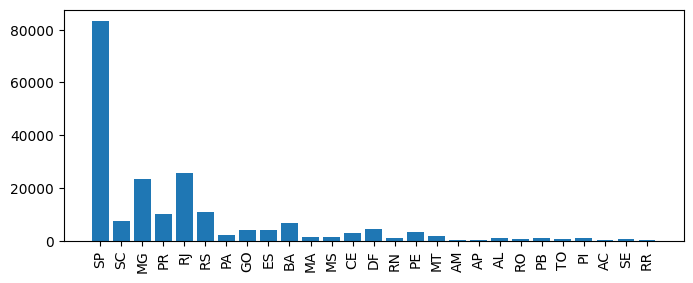

In [31]:
query="""select customer_state , count(customers.customer_unique_id) from customers
group by customer_state"""

cur.execute(query)

data=cur.fetchall()
data
df1=pd.DataFrame(data, columns=["state", "customer"])
df1

import matplotlib.pyplot as plt
import seaborn as sns
df1.sort_values(by= "customer", ascending=False)
plt.figure(figsize=(8,3))
plt.bar(df1["state"],df1["customer"])
plt.xticks(rotation=90)

plt.show()



# calculate the number of orders of per month in 2018

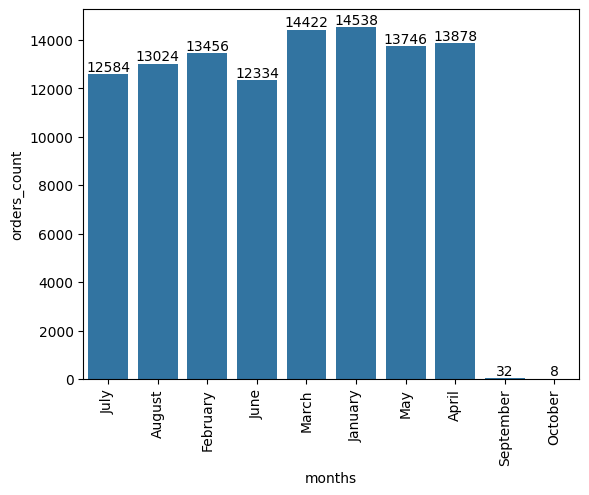

In [67]:
query="""select monthname(order_purchase_timestamp)  months, count(order_id)
from orders
where year(order_purchase_timestamp)=2018
group by months"""

cur.execute(query)

data=cur.fetchall()

data
df=pd.DataFrame(data,columns=["months","orders_count"])
o=["january","february","march","april","may","june","july","august","seprember","octomber"]
ax=sns.barplot(x=df["months"],y=df["orders_count"])
df.sort_values(by= "orders_count", ascending=False)
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])
plt.show()


In [2]:
query="""select monthname(order_purchase_timestamp)  months, count(order_id)
from orders
where year(order_purchase_timestamp)=2018
group by months"""

cur.execute(query)

data=cur.fetchall()
data

[('July', 12584),
 ('August', 13024),
 ('February', 13456),
 ('June', 12334),
 ('March', 14422),
 ('January', 14538),
 ('May', 13746),
 ('April', 13878),
 ('September', 32),
 ('October', 8)]

In [8]:
query="""with count_per_order as
(select orders.order_id,orders.customer_id, count(order_items.order_id)
as oc
from orders join order_items
on orders.order_id=order_items.order_id 
group by orders.order_id,orders.customer_id)
select customers.customer_city ,round(avg(count_per_order.oc),2)
from customers join count_per_order
on customers.customer_id=count_per_order.customer_id
group by customers.customer_city"""

cur.execute(query)

data=cur.fetchall()
data
has=pd.DataFrame(data, columns=["city","avg_value"])
has.sort_values(by="avg_value", ascending=False)

has

,city,avg_value
0,sao paulo,4.62
1,sao jose dos campos,4.55
2,porto alegre,4.70
3,indaial,4.46
4,treze tilias,5.09
...,...,...
4105,aurora do para,4.00
4106,nova america,4.00
4107,tibau do sul,4.00
4108,lagoa da canoa,4.00


# calculate the percentege of total revenue contributed by each product category

In [17]:
query="""select products.product_category as category,round(sum(payments.payment_value)/(select sum(payments.payment_value)
 from payments)*100,2)as percentege  from products join 
order_items on products.product_id=order_items.product_id 
join payments on order_items.order_id=payments.order_id
group by category order by percentege desc """

cur.execute(query)

data=cur.fetchall()
data




[('bed table bath', 42.79),
 ('HEALTH BEAUTY', 41.41),
 ('computer accessories', 39.61),
 ('Furniture Decoration', 35.73),
 ('Watches present', 35.71),
 ('sport leisure', 34.78),
 ('housewares', 27.35),
 ('automotive', 21.3),
 ('Garden tools', 20.95),
 ('Cool Stuff', 19.48),
 ('Furniture office', 16.16),
 ('toys', 15.47),
 ('babies', 13.49),
 ('perfumery', 12.66),
 ('telephony', 12.17),
 ('stationary store', 7.93),
 ('pet Shop', 7.78),
 ('PCs', 6.97),
 ('electronics', 6.49),
 (None, 6.32),
 ('Construction Tools Construction', 6.03),
 ('musical instruments', 5.82),
 ('electrostile', 5.64),
 ('Fashion Bags and Accessories', 5.45),
 ('fixed telephony', 5.17),
 ('Games consoles', 4.88),
 ('Bags Accessories', 4.68),
 ('Casa Construcao', 3.41),
 ('Room Furniture', 3.4),
 ('ELECTRICES 2', 3.11),
 ('Agro Industria e Comercio', 2.97),
 ('home appliances', 2.39),
 ('climatization', 2.28),
 ('House comfort', 2.11),
 ('Furniture Kitchen Service Area Dinner and Garden', 1.87),
 ('Construction Tools

# identify the correlation between product price and the number of times a product has been purchased

In [5]:
query="""select products.product_category,count(order_items.product_id), round(avg(order_items.price),2)
from products join order_items on
products.product_id=order_items.product_id
group by products.product_category"""

cur.execute(query)

data=cur.fetchall()
data
df=pd.DataFrame(data)
df

,0,1,2
0,HEALTH BEAUTY,38680,130.16
1,sport leisure,34564,114.34
2,Cool Stuff,15184,167.36
3,computer accessories,31308,116.51
4,Watches present,23964,201.14
...,...,...,...
69,flowers,132,33.64
70,Kitchen portable and food coach,60,264.57
71,CITTE AND UPHACK FURNITURE,152,114.95
72,House Comfort 2,120,25.34


# calculate the total revenue generated by each seller , and rank them by revenue

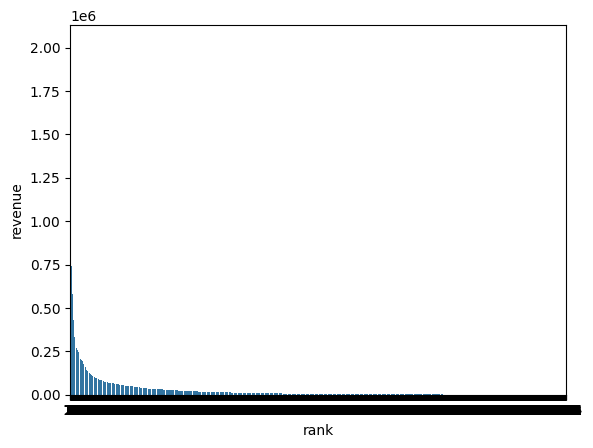

In [15]:
query="""select *, dense_rank() over(order by revenue desc) as rn from (select order_items.seller_id,sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id=payments.order_id 
group by order_items.seller_id) as a """

cur.execute(query)

data=cur.fetchall()
data
df=pd.DataFrame(data, columns=["seller_id","revenue", "rank"])
df
sns.barplot(x="rank",y="revenue", data=df)
# plt.xticks(rotation=90)
plt.show()

# calculate the moving average of order values for each customer over their order history

In [19]:
query=""" select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id  order by order_purchase_timestamp
rows between 2 preceding and current row ) as mov_avg
from (select orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value as payment from payments join orders
on payments.order_id= orders.order_id) as a """

cur.execute(query)

data=cur.fetchall()
data
df=pd.DataFrame(data)
df

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
...,...,...,...,...
415539,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000
415540,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
415541,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
415542,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
